In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 1. LOADING DATASET

In [2]:
athletes = pd.read_csv(r'D:\Python Jupiter\archive\athlete_events.csv')
regions = pd.read_csv(r'D:\Python Jupiter\archive\noc_regions.csv')

Knowing the dataset using head() function. 1896-2016

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


## Description of the dataset.

In [5]:
athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


## Information derived from the desciptive statistics:

>>The age of youngest player in olympics history was 10 years.

>>The shortest player in an olympic history's height was 127cm.

>>The average anthropometric mesasurements of the olympians are :- age 25 yrs, height 175 cm and weight 70 kg 

>>The age of the oldest participant in the history was 97 yrs.

>>The tallest player in the history of olympics was of 226cm.

Joining both the dataset.

In [6]:
# Joining datasets
df = athletes.merge(regions, how='left' , on='NOC')

In [7]:
#Checking the shape of dataset (no. of rows and columns)
df.shape

(271116, 17)

In [8]:
#Column Names
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

## 2. CLEANING DATASET

The formatting of columns (region, notes) are not correct.

In [9]:
#Renaming the column names
df.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=1)
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes'],
      dtype='object')

In [10]:
#Checking for null values
NaN_values = df.isna()
NaN_columns = NaN_values.any()
NaN_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

The columns whose results contain True means they consist of null values(NaN value) while results consisting False indicates there is no null values (NaN value).

Finding the count of NaN values.

In [11]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

The result shows that MEDAL column contains maximum null values in comparison to others. 
>>Reason being not all participants win a medal

In [12]:
#Print the list of those columns which contains at least one null value.
df.columns[df.isna().any()].tolist()

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

In [13]:
#Country specific data
df.query('Team=="India"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [14]:
#Comparison between two countries
Japan = df.query('Team=="Japan"').describe()
India = df.query('Team=="India"').describe()
print(Japan,India)

                  ID          Age       Height       Weight         Year
count    8289.000000  8173.000000  7408.000000  7348.000000  8289.000000
mean    81911.857522    24.423345   168.173326    63.215977  1983.835203
std     33529.498257     5.164253     9.381821    11.962552    23.903994
min       362.000000    11.000000   140.000000    28.000000  1912.000000
25%     56727.000000    21.000000   162.000000    56.000000  1968.000000
50%     84070.000000    24.000000   168.000000    62.000000  1988.000000
75%    116223.000000    27.000000   175.000000    70.000000  2004.000000
max    134133.000000    71.000000   208.000000   145.000000  2016.000000                   ID          Age      Height      Weight         Year
count    1400.000000  1250.000000  887.000000  865.000000  1400.000000
mean    76701.817143    25.508000  171.577227   67.682659  1978.825714
std     38073.641662     5.171705    9.582507   14.340968    26.931590
min       281.000000    15.000000  137.000000   43.000000  

Some insights from above generated descriptive stats:
>>The average age of Japanese players is 24 yrs 5 months while that of India is 25 yrs 6 months.

>>On average Indian players(171 cm) are about 3 cm taller than players of Japan(168 cm).

>>On average Japanese players are around 63kg while Indian players are around 67kg.

In [15]:
#Top 10 countries based on participation rate i.e. count of players participated since 1950.
Top_10 = df.Team.value_counts().sort_values(ascending=False).head(10)
Top_10

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: count, dtype: int64

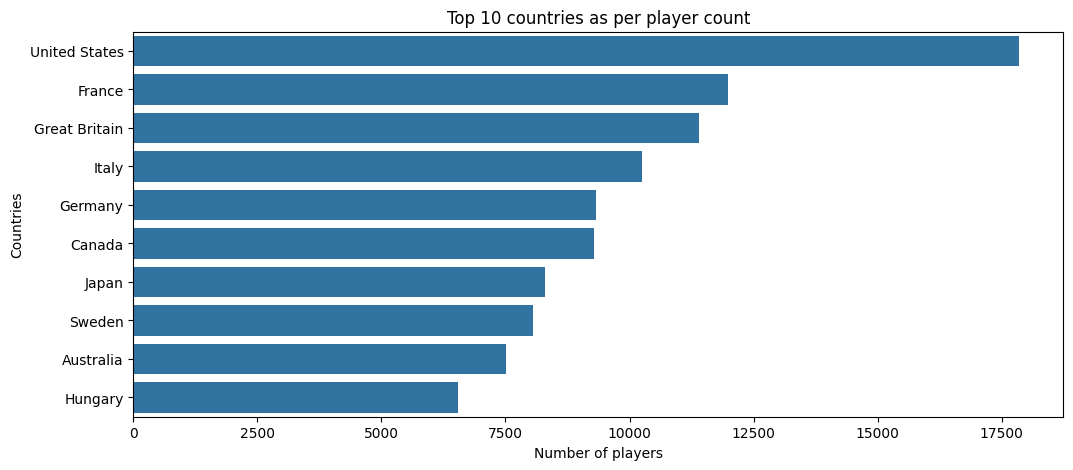

In [16]:
#Graphical representation of Top 10 countries with most participation
plt.figure(figsize=(12,5))
sns.barplot(x=Top_10, y=Top_10.index)
plt.title('Top 10 countries as per player count')
plt.xlabel('Number of players')
plt.ylabel('Countries')
plt.show()

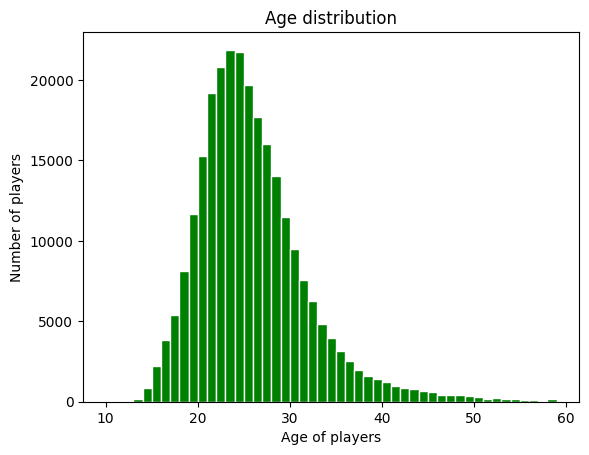

In [17]:
#Age distribution of players
plt.Figure(figsize=(12,4))
plt.hist(df.Age, bins = np.arange(10,60), color='green', edgecolor='white')
plt.title('Age distribution')
plt.xlabel('Age of players')
plt.ylabel('Number of players')
plt.show()

In [18]:
#Sports played in winter olympics
Winter_games = [df[df.Season=='Winter'].Sport.unique()]
for i in Winter_games:
    print(i)

['Speed Skating' 'Cross Country Skiing' 'Ice Hockey' 'Biathlon'
 'Alpine Skiing' 'Luge' 'Bobsleigh' 'Figure Skating' 'Nordic Combined'
 'Freestyle Skiing' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Short Track Speed Skating' 'Skeleton' 'Military Ski Patrol' 'Alpinism']


In [19]:
#Sports played in summer olympics
Summer_games = [df[df.Season=='Summer'].Sport.unique()]
for i in Summer_games:
    print(i)

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics']


In [20]:
#Ratio of Male vs Female participant in the olympic history
male_count = df['Sex'][df.Sex=='M'].count()
female_count = df['Sex'][df.Sex=='F'].count()
total_count = df.Sex.count()
male_ratio = int((male_count/total_count)*100)
female_ratio = int((female_count/total_count)*100)
print(f"Male vs Female participation ratio in olympic history is {male_ratio}:{female_ratio}")

Male vs Female participation ratio in olympic history is 72:27


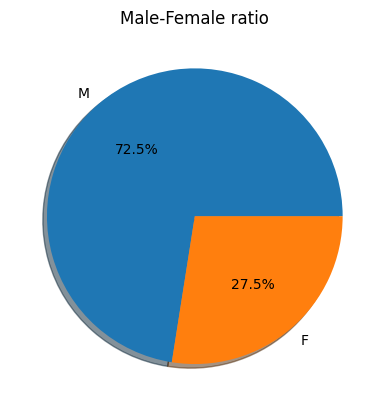

In [21]:
#Graphical representation of gender distribution
gender_counts = df.Sex.value_counts()
plt.Figure(figsize=(10,5))
plt.pie(gender_counts, labels= gender_counts.index, autopct='%1.1f%%', shadow=True)
plt.title('Male-Female ratio')
plt.show()

In [33]:
#Filtered ratio on basis of participation year
male_count= df['Sex'][df.Sex=='M'][df.Year>1950].count()
female_count= df['Sex'][df.Sex=='F'][df.Year>1950].count()
male_ratio= int((male_count/total_count)*100)
female_ratio== int((female_count/total_count)*100)
print(f"Male vs Female participation ratio after 1950 is {male_ratio}:{female_ratio}")

Male vs Female participation ratio after 1950 is 56:0


In [23]:
#Male vs Female ratio on basis of each olympic and the gap between them
Year = np.arange(1896,2017,4).tolist()
for i in Year:
    male_count = df['Sex'][df.Sex=='M'][df.Year>i].count()
    female_count = df['Sex'][df.Sex=='F'][df.Year>i].count()
    male_ratio = int((male_count/total_count)*100)
    female_ratio = int((female_count/total_count)*100)
    gap = male_ratio - female_ratio
    try:
        venue = df.City[df.Year ==i].unique()[0]
    except:
        venue = 'Unknown'
    print(f"Male-Female ratio in {venue}({i}) is {male_ratio}:{female_ratio} and the gap is {gap}")

Male-Female ratio in Athina(1896) is 72:27 and the gap is 45
Male-Female ratio in Paris(1900) is 71:27 and the gap is 44
Male-Female ratio in St. Louis(1904) is 71:27 and the gap is 44
Male-Female ratio in London(1908) is 69:27 and the gap is 42
Male-Female ratio in Stockholm(1912) is 67:27 and the gap is 40
Male-Female ratio in Unknown(1916) is 67:27 and the gap is 40
Male-Female ratio in Antwerpen(1920) is 66:27 and the gap is 39
Male-Female ratio in Paris(1924) is 64:27 and the gap is 37
Male-Female ratio in Amsterdam(1928) is 62:27 and the gap is 35
Male-Female ratio in Los Angeles(1932) is 61:26 and the gap is 35
Male-Female ratio in Berlin(1936) is 58:26 and the gap is 32
Male-Female ratio in Unknown(1940) is 58:26 and the gap is 32
Male-Female ratio in Unknown(1944) is 58:26 and the gap is 32
Male-Female ratio in London(1948) is 56:26 and the gap is 30
Male-Female ratio in Helsinki(1952) is 53:25 and the gap is 28
Male-Female ratio in Cortina d'Ampezzo(1956) is 51:25 and the gap

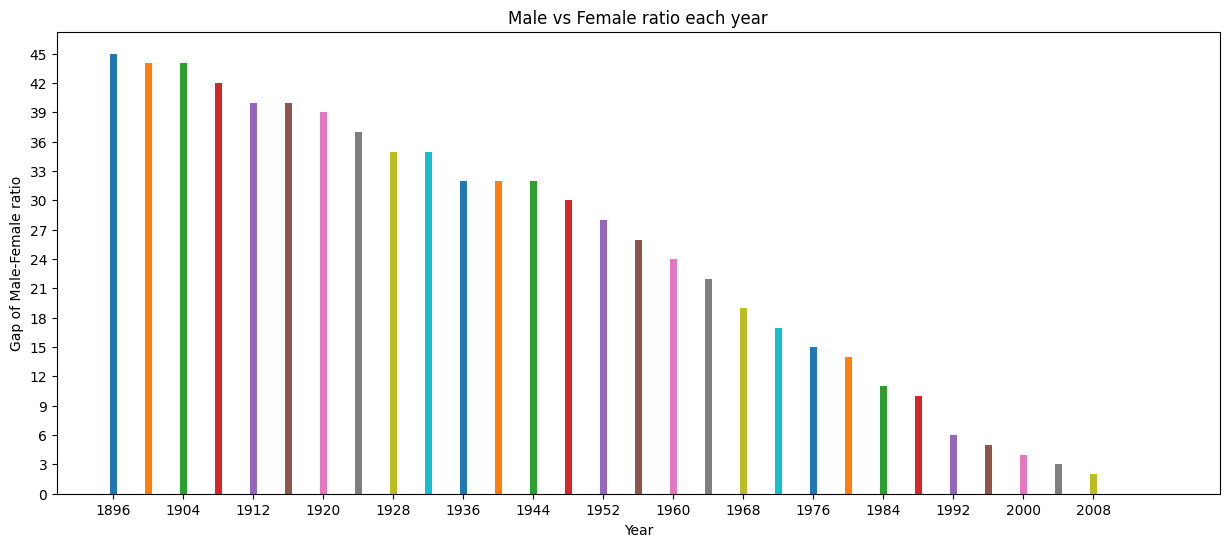

In [24]:
# Graphical representation of male-female participation ratio since 1896.
plt.figure(figsize=(15,6))
plt.title("Male vs Female ratio each year")
plt.xlabel("Year")
plt.ylabel("Gap of Male-Female ratio")
plt.yticks(np.arange(0,50,3))
plt.xticks(np.arange(1896,2016,8))
for i in Year:
    male_count = df['Sex'][df.Sex=='M'][df.Year>i].count()
    female_count = df['Sex'][df.Sex=='F'][df.Year>i].count()
    male_ratio = int((male_count/total_count)*100)
    female_ratio = int((female_count/total_count)*100)
    gap = male_ratio - female_ratio
    plt.bar(i,gap)
plt.show()

## CONCLUSION

>>At the time when Olympics was started (in 1896) there was a visible gap in the male-female ratio i.e. 45.

>>Over time the male-female ratio kept decreasing.

>>In the year 1956 the gap was 26.

>>By the end of 20th century the gap neared down to 4-5.

>>Eventually in 2012. First time in Olympic history the participation ratio of male-female beacme zero.

In [25]:
#Find the total female participation in each Summer olympic
female_athlete = df[(df.Sex=='F') & (df.Season=='Summer')][['Year','Sex']]
female_athlete = female_athlete.groupby('Year').count().reset_index()
female_athlete.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


C:\Users\HP\AppData\Local\Temp\ipykernel_14180\2538898755.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year',data=female_summer_df,palette='ocean')


Text(0.5, 1.0, 'Female participation in summer olympics')

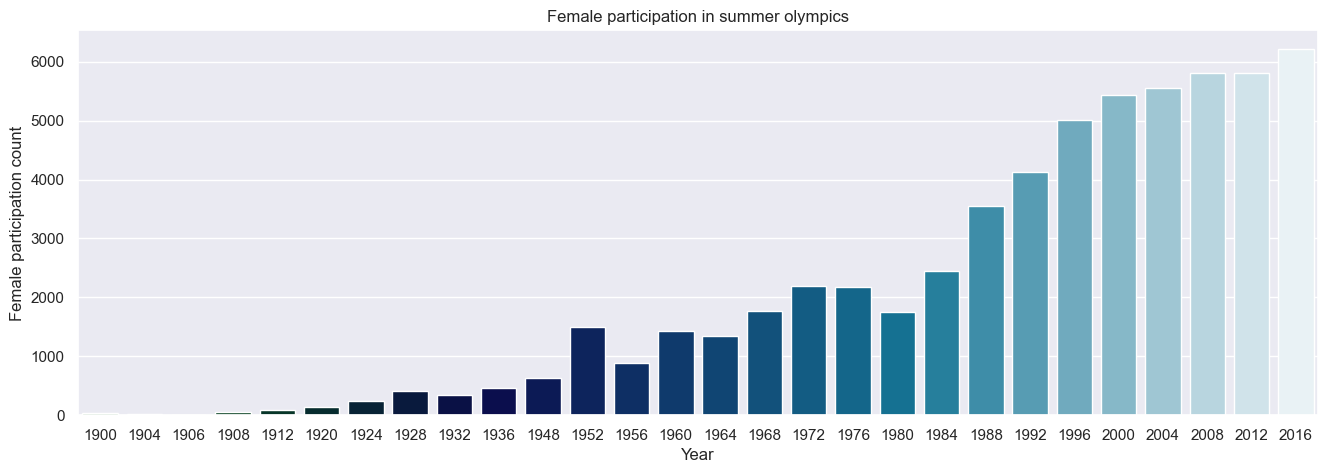

In [26]:
#Graphical representation of female in summer olympics
female_summer_df = df[(df.Sex=='F') & (df.Season=='Summer')]
sns.set(style='darkgrid')
plt.figure(figsize=(16,5))
sns.countplot(x='Year',data=female_summer_df,palette='ocean')
plt.ylabel('Female participation count')
plt.title('Female participation in summer olympics')

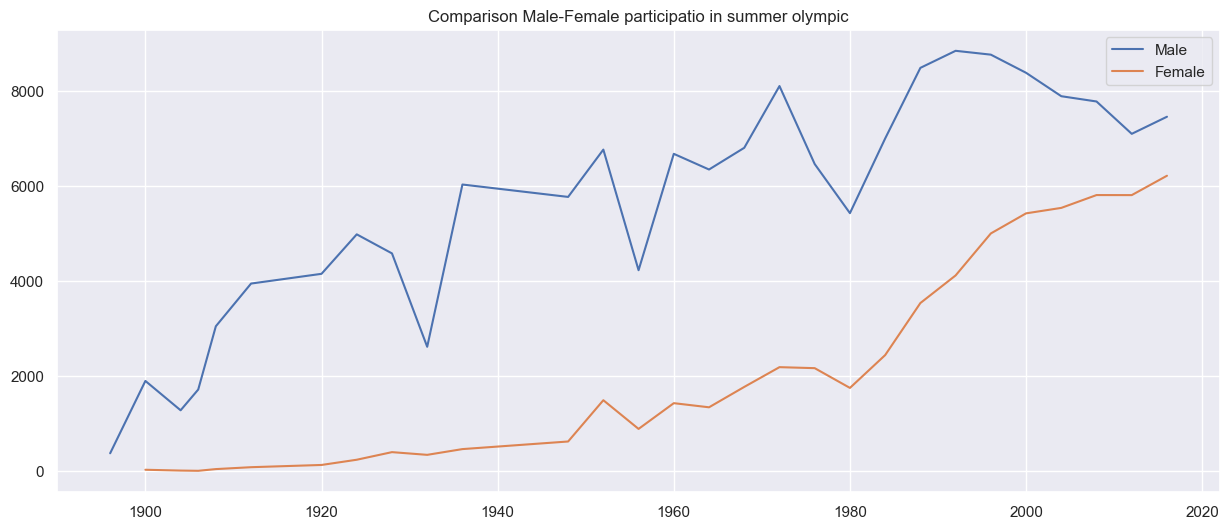

In [27]:
#Male participant in summer olympic yearwise
male_participant_yearwise = df[(df.Sex=='M') & (df.Season=='Summer')][['Sex','Year']]
male_participant_yearwise = male_participant_yearwise.groupby("Year").count()
#Female participant in summer olympic yearwise
female_participant_yearwise = df[(df.Sex=='F') & (df.Season=='Summer')][['Sex','Year']]
female_participant_yearwise = female_participant_yearwise.groupby("Year").count()

#Plotting a graph to show the distribution for each group
plt.figure(figsize=(15,6))
plt.plot(male_participant_yearwise['Sex'],label="Male")
plt.plot(female_participant_yearwise['Sex'],label="Female")
plt.title("Comparison Male-Female participatio in summer olympic")
plt.legend()
plt.show()

In [28]:
#Top 10 countries with most number of medals
Top_Countries_with_medals = df[["Team","Medal"]]
Top_Countries_with_medals = Top_Countries_with_medals.groupby("Team").count().sort_values(by='Medal', ascending=False).reset_index()
Top_Countries_with_medals = Top_Countries_with_medals.head(10)
Top_Countries_with_medals

,Team,Medal
0,United States,5219
1,Soviet Union,2451
2,Germany,1984
3,Great Britain,1673
4,France,1550
5,Italy,1527
6,Sweden,1434
7,Australia,1306
8,Canada,1243
9,Hungary,1127


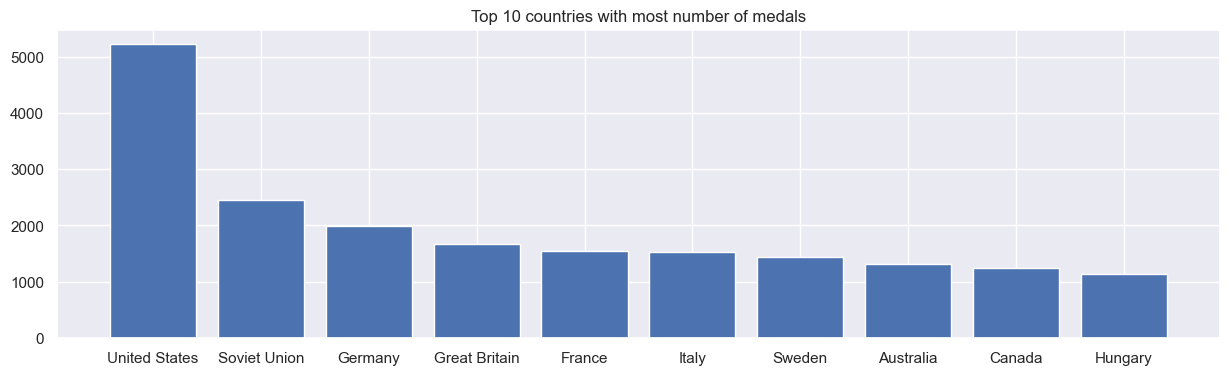

In [29]:
#Graphical representation of Top 10 countries with most number of medals
plt.figure(figsize=(15,4))
plt.title("Top 10 countries with most number of medals")
plt.bar(Top_Countries_with_medals['Team'],Top_Countries_with_medals['Medal'])
plt.show()

In [30]:
#Details of player who won gold medal and are older than 60 yrs.
Gold_medalist_above_60 = df[(df.Age>60)&(df.Medal=='Gold')][['Name','Age','Team','Sport','Medal']]
Gold_medalist_above_60

,Name,Age,Team,Sport,Medal
104003,Isaac Lazarus Israls,63.0,Netherlands,Art Competitions,Gold
105199,Charles Jacobus,64.0,United States,Roque,Gold
190952,"Lida Peyton ""Eliza"" Pollock (McMillen-)",63.0,Cincinnati Archers,Archery,Gold
226374,"Galen Carter ""G. C."" Spencer",63.0,Potomac Archers,Archery,Gold
233390,Oscar Gomer Swahn,64.0,Sweden,Shooting,Gold
261102,"Robert W. Williams, Jr.",63.0,Potomac Archers,Archery,Gold


## 🏅 Country-wise Performance Analysis

This section analyzes how different countries have performed in the Olympics from 1896 to 2016 by counting the number of medals won. We'll look at overall medal counts and highlight the top-performing nations.


C:\Users\HP\AppData\Local\Temp\ipykernel_14180\2860126632.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_countries, x='Medal', y='region', palette='viridis')


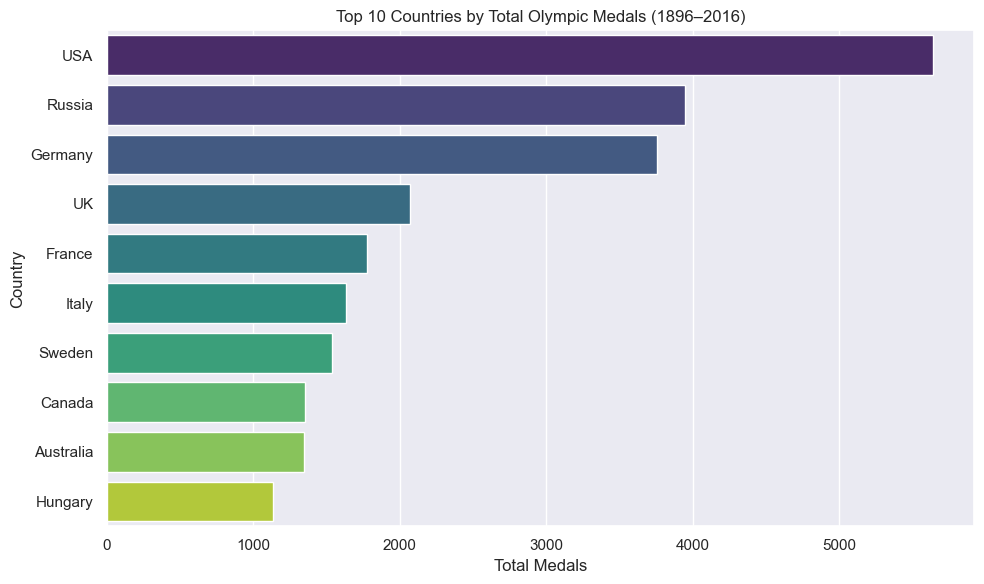

In [31]:
# Merge athlete and region data
athletes_df = athletes.merge(regions, how='left', on='NOC')

# Filter only medal winners
medal_winners = athletes_df[athletes_df['Medal'].notnull()]

# Group by region and count medals
country_medals = medal_winners.groupby('region')['Medal'].count().reset_index().sort_values(by='Medal', ascending=False)

# Top 10 countries by total medals
top_10_countries = country_medals.head(10)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_countries, x='Medal', y='region', palette='viridis')
plt.title('Top 10 Countries by Total Olympic Medals (1896–2016)')
plt.xlabel('Total Medals')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## Overall Participation Trends

This section visualizes how Olympic participation has evolved over time in terms of the number of athletes, participating countries, and events.

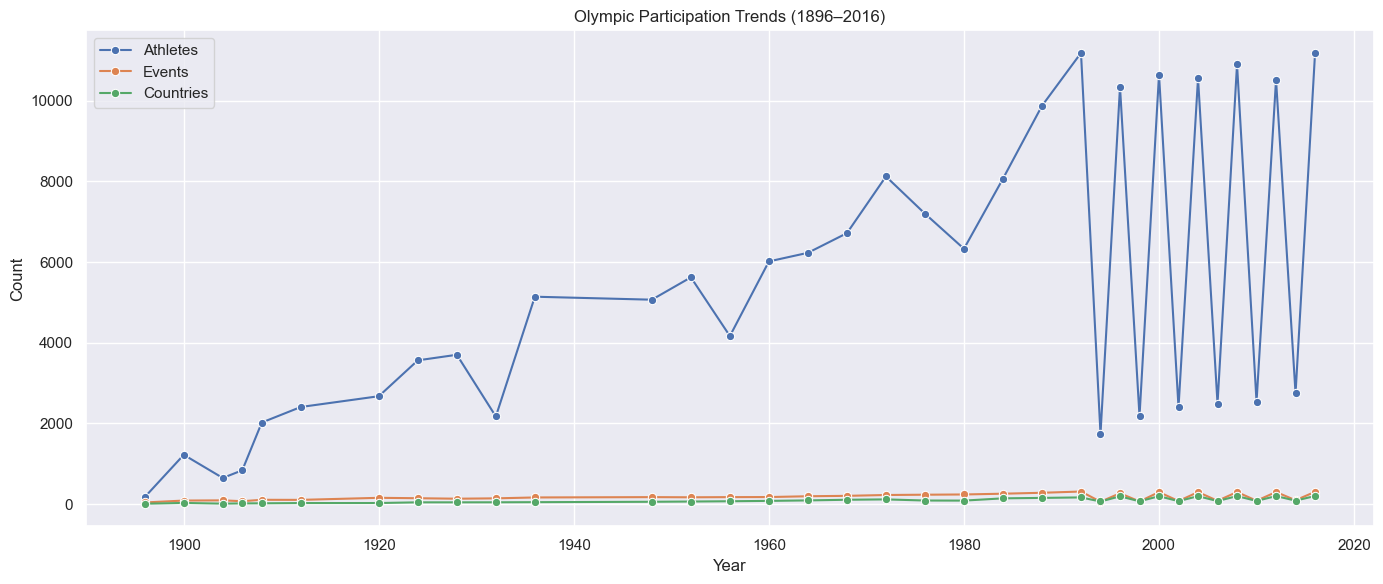

In [32]:
# Number of athletes per year
athlete_counts = athletes.groupby('Year')['ID'].nunique().reset_index(name='Athletes')

# Number of events per year
event_counts = athletes.groupby('Year')['Event'].nunique().reset_index(name='Events')

# Number of participating countries per year
country_counts = athletes.merge(regions, how='left', on='NOC').drop_duplicates(subset=['Year', 'region'])
country_counts = country_counts.groupby('Year')['region'].nunique().reset_index(name='Countries')

# Merge all three counts into one DataFrame
participation = athlete_counts.merge(event_counts, on='Year').merge(country_counts, on='Year')

# Plotting
plt.figure(figsize=(14,6))
sns.lineplot(data=participation, x='Year', y='Athletes', label='Athletes', marker='o')
sns.lineplot(data=participation, x='Year', y='Events', label='Events', marker='o')
sns.lineplot(data=participation, x='Year', y='Countries', label='Countries', marker='o')
plt.title('Olympic Participation Trends (1896–2016)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Sport and Event Evolution

This section explores how the number of unique sports and events in the Olympics has evolved from 1896 to 2016. This helps us understand how the Olympic Games have expanded in terms of variety and complexity.

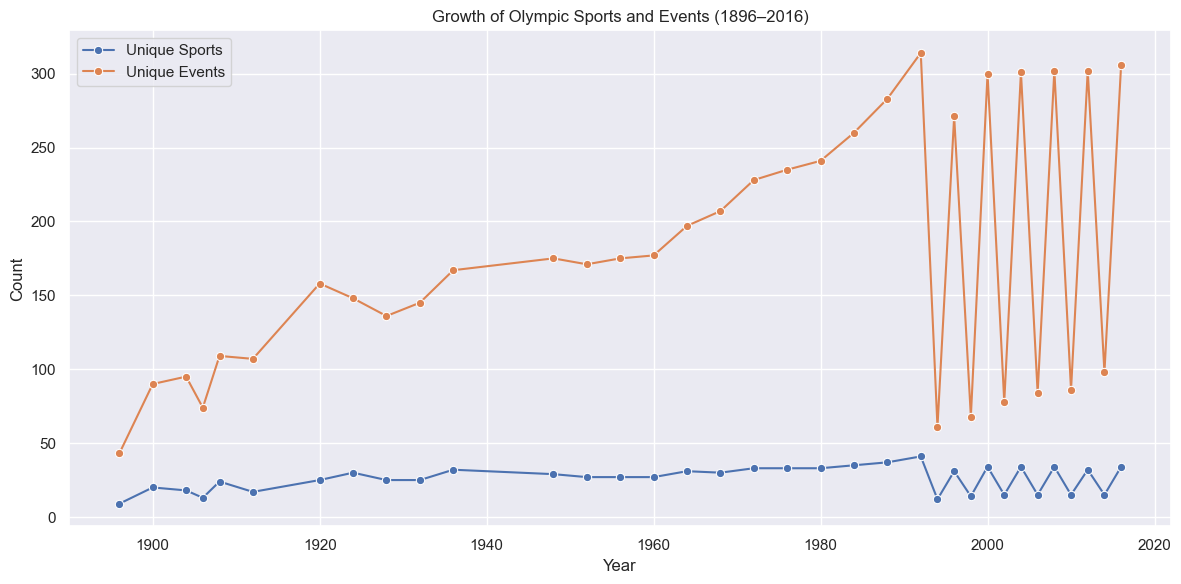

In [34]:
# Number of unique sports per year
sports_over_time = athletes.groupby('Year')['Sport'].nunique().reset_index(name='Unique Sports')

# Number of unique events per year
events_over_time = athletes.groupby('Year')['Event'].nunique().reset_index(name='Unique Events')

# Plotting the graph
plt.figure(figsize=(12,6))
sns.lineplot(data=sports_over_time, x='Year', y='Unique Sports', label='Unique Sports', marker='o')
sns.lineplot(data=events_over_time, x='Year', y='Unique Events', label='Unique Events', marker='o')
plt.title('Growth of Olympic Sports and Events (1896–2016)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()